In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('austin_weather.csv')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

<h2>Visualisasi Scatter Plot Perbandingan Kuantitatif</h2>

Pada tugas kali ini kita akan mengamati nilai DewPointAvg (F) dengan mengamati nilai  HumidityAvg (%), TempAvg (F), dan WindAvg (MPG)

Perhatikan bahwa data kita tidaklah siap untuk di analisis, salah satunya tipe data dari DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG) adalah object, padahalnya data nya ber isi numeric. maka :
- Ubahlah tipe data tersebut menjadi tipe data float

Step2 : 

- Kalian tidak akan dengan mudah mengubah tipe data tersebut karena column tersebut mempunyai nilai '-' yang dimana tidak bisa di ubah ke bentuk float, maka replace lah terlebih dahulu data yang bernilai '-' dengan nilai NaN, gunakan method .replace(). baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
- Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
- Sekarang ubah tipe datanya dengan float, gunakan method .astype(), baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

Setelah ini sebagian data siap untuk di jadikan bahan analisis. maka :

Buahlah visualisasi perbandingan kuantitatif scatter plot, sehingga menghasilkan gambar seperti dibawah :

ket : 

- colormap adalah 'coolwarm'
- berikat warna terhadap setiap data poin dengan nilai dari column TempAvgF
- berikan size terhadap setiap data poin dengan nilai dari column WindAvgMPH, kalikan dengan 20 agar size terlihat lebih besar


Berikan pendapat dari insight yang bisa di dapat dari visualisasi perbandingan kuantitatif ini!!!

![image.png](attachment:image.png)

In [0]:
# DewPointAvgF
# HumidityAvgPercent
# TempAvgF
# WindAvgMPH
df['DewPointAvgF'] = df['DewPointAvgF'].replace({'-':None})
df['HumidityAvgPercent'] = df['HumidityAvgPercent'].replace({'-':None})
df['WindAvgMPH'] = df['WindAvgMPH'].replace({'-':None})

In [0]:
df[df['DewPointAvgF'].isnull()]

In [0]:
df[df['HumidityAvgPercent'].isnull()]

In [0]:
df[df['WindAvgMPH'].isnull()]

In [0]:
df['DewPointAvgF'] = df['DewPointAvgF'].fillna(method='ffill')
df['HumidityAvgPercent'] = df['HumidityAvgPercent'].fillna(method='ffill')
df['WindAvgMPH'] = df['WindAvgMPH'].fillna(method='ffill')

In [0]:
df[df['DewPointAvgF'].isnull()]

In [0]:
df[df['HumidityAvgPercent'].isnull()]

In [0]:
df[df['WindAvgMPH'].isnull()]

In [0]:
df['DewPointAvgF'] = df['DewPointAvgF'].astype(float)
df['HumidityAvgPercent'] = df['HumidityAvgPercent'].astype(float)
df['WindAvgMPH'] = df['WindAvgMPH'].astype(float)
df['TempAvgF'] = df['TempAvgF'].astype(float)

In [0]:
df

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60.0,45,67,49.0,43,93,75.0,57,29.86,29.68,29.59,10,7,2,20,4.0,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48.0,39,43,36.0,28,93,68.0,43,30.41,30.13,29.87,10,10,5,16,6.0,25,0,
2,2013-12-23,58,45.0,32,31,27.0,23,76,52.0,27,30.56,30.49,30.41,10,10,10,8,3.0,12,0,
3,2013-12-24,61,46.0,31,36,28.0,21,89,56.0,22,30.56,30.45,30.3,10,10,7,12,4.0,20,0,
4,2013-12-25,58,50.0,41,44,40.0,36,86,71.0,56,30.41,30.33,30.27,10,10,7,10,2.0,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89.0,75,71,67.0,61,82,54.0,25,30.04,29.97,29.88,10,10,10,12,5.0,21,0,
1315,2017-07-28,105,91.0,76,71,64.0,55,87,54.0,20,29.97,29.9,29.81,10,10,10,14,5.0,20,0,
1316,2017-07-29,107,92.0,77,72,64.0,55,82,51.0,19,29.91,29.86,29.79,10,10,10,12,4.0,17,0,
1317,2017-07-30,106,93.0,79,70,68.0,63,69,48.0,27,29.96,29.91,29.87,10,10,10,13,4.0,20,0,


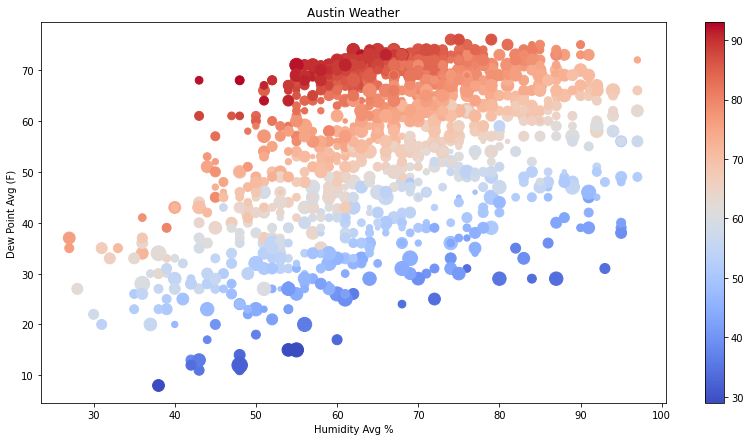

In [0]:
fig, ax = plt.subplots(figsize=(14,7))

D = df['DewPointAvgF']
H = df['HumidityAvgPercent']
W = df['WindAvgMPH']
T = df['TempAvgF']

axmap = ax.scatter(H, D, c=T, cmap='coolwarm', sizes=W*20)

ax.set_xlabel('Humidity Avg %')
ax.set_ylabel('Dew Point Avg (F)')
ax.set_title('Austin Weather')
fig.colorbar(axmap)
plt.show()

Insight yang menurut saya didapat yaitu kita dapat melihat data austin weather dengan data humidity dan dew point, semakin rendah nilainya maka semakin berwarna biru dan semakin tinggi nilainya maka lebih berwarna merah.